## Clasificación


**La clasificación** predice *etiquetas discretas (resultados)* como `sí` /` no`, `Verdadero` /` Falso`, o cualquier tipo de variable discreta, como una letra mediante de reconocimiento de texto, o una palabra mediante el reconocimiento de un discurso. Hay dos métodos principales para entrenar clasificadores: aprendizaje supervisado y aprendizaje no supervisado. La diferencia entre los dos es que el aprendizaje no supervisado no usa etiquetas, mientras que el aprendizaje supervisado usa etiquetas para construir el clasificador. El objetivo del aprendizaje no supervisado es agrupar los atributos de entrada sin usar etiquetas que guíen la agrupación.

![list](https://apmonitor.com/che263/uploads/Begin_Python/list.png)

### Aprendizaje Supervisado para Clasificar Números

Un conjunto de datos incluido en sklearn es un conjunto de 1797 imágenes de números de 64 píxeles (8x8). Cada uno tiene etiquetas que indican la respuesta correcta. Se entrena un Clasificador de Vectores de Soporte (Support Vector Classifier) en la primera mitad de las imágenes.


In [2]:
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Entrenar el Clasificador
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
svc = svm.SVC(gamma=0.001)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)
svc.fit(X_train, y_train)
print('SVC Entrenado')

SVC Entrenado


![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Prueba del Clasificador de Números

La clasificación de imágenes se entrena con 10 imágenes seleccionadas aleatoriamente que pertenecen a la otra mitad de los datos para evaluar el entrenamiento. Ejecuta la prueba del clasificador hasta que observes un número mal clasificado.

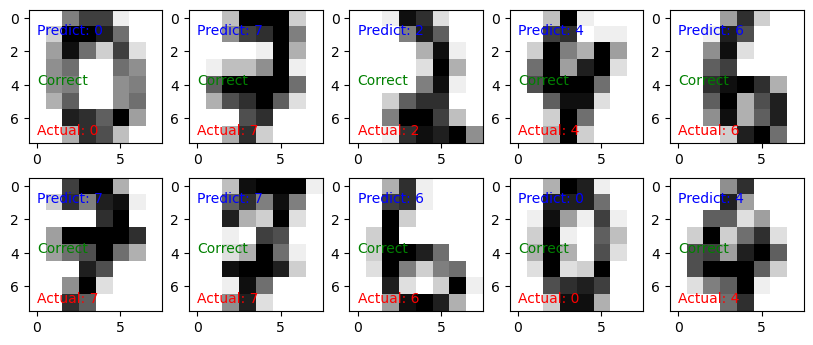

In [3]:
plt.figure(figsize=(10,4))
for i in range(10):
    n = np.random.randint(int(n_samples/2),n_samples)
    predict = svc.predict(digits.data[n:n+1])[0]
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.text(0,7,'Actual: ' + str(digits.target[n]),color='r')
    plt.text(0,1,'Predict: ' + str(predict),color='b')
    if predict==digits.target[n]:
        plt.text(0,4,'Correct',color='g')
    else:
        plt.text(0,4,'Incorrect',color='orange')
plt.show()

![buildings](https://apmonitor.com/che263/uploads/Begin_Python/buildings.png)

### Clasificación con Aprendizaje Supervisado

Selecciona la opción del conjunto de datos con `moons` (lunas), `circles` (círculos), o `blobs` (manchas). Ejecuta la celda a continuación para generar los datos que serán usados en la evaluación de los clasificadores.

In [4]:
option = 'moons' # moons, circles, o blobs

n = 2000 # número de puntos de datos
X = np.random.random((n,2))
mixing = 0.0 # añadir un elemento de mezcla aleatorio a los datos
xplot = np.linspace(0,1,100)
if option=='moons':
    X, y = datasets.make_moons(n_samples=n,noise=0.1)
    yplot = xplot*0.0
elif option=='circles':
    X, y = datasets.make_circles(n_samples=n,noise=0.1,factor=0.5)
    yplot = xplot*0.0
elif option=='blobs':
    X, y = datasets.make_blobs(n_samples=n,centers=[[-5,3],[5,-3]],cluster_std=2.0)
    yplot = xplot*0.0
# Dividir subconjuntos de entrenamiento y testeo (50% cada uno)
XA, XB, yA, yB = train_test_split(X, y, test_size=0.5, shuffle=False)
# Graficar resultados de la clasificación
def assess(P):
    plt.figure()
    plt.scatter(XB[P==1,0],XB[P==1,1],marker='^',color='blue',label='True')
    plt.scatter(XB[P==0,0],XB[P==0,1],marker='x',color='red',label='False')
    plt.scatter(XB[P!=yB,0],XB[P!=yB,1],marker='s',color='orange',\
                alpha=0.5,label='Incorrect')
    plt.legend()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.1 Regresión Logística

**Definición:** La regresión logística es un algoritmo de machine learning para clasificación. En este algoritmo, las probabilidades asociadas a los diferentes resultados de un solo ensayo se modelan utilizando una función logística.

**Ventajas:** La regresión logística está diseñada para este propósito (clasificación), y es principalmente útil para entender la influencia de varias variables independientes en una única variable de salida (resultado).

**Desventajas:** Funciona solo si la variable a predecir es binaria. Asume que todas las predicciones son independientes entre sí, y asume que no hay valores faltantes en los datos.

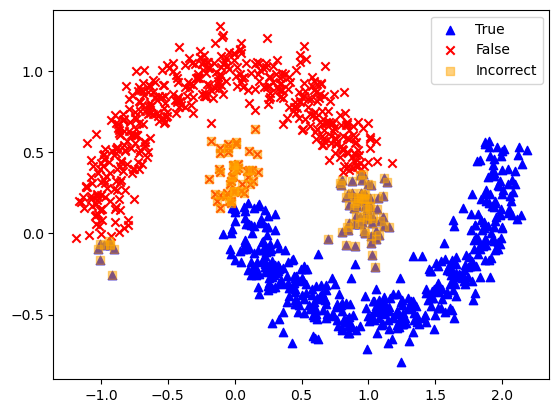

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(XA,yA)
yP = lr.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.2 Naïve Bayes

**Definición:** El algoritmo de Naive Bayes, basado en el teorema de Bayes, trabaja bajo la suposición de independencia entre cualquier par de atributos. Los clasificadores de Naive Bayes funcionan bien en múltiples situaciones reales, tales como la clasificación de documentos y filtro de spam.

**Ventajas:** Este algoritmo requiere pocos datos de entrenamiento para estimar los parámetros necesarios. Comparado con otros métodos más sofisticados, los clasificadores de Naive Bayes son extremadamente rápidos.

**Desventajas:** El algoritmo de Naive Bayes es conocido por ser un mal estimador.

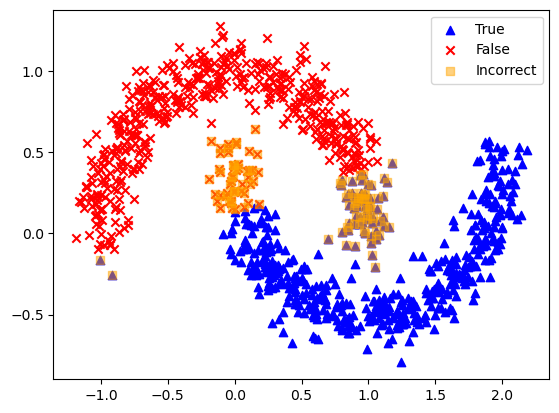

In [6]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(XA,yA)
yP = nb.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.3 Descenso de Gradientes Estocástico (Stochastic Gradient Descent)

**Definición:** El Descenso de Gradientes Estocástico es un enfoque simple y muy eficiente para adaptarse a modelos lineales. Es particularmente útil cuando el número de muestras es muy grande. Soporta diferentes funciones de pérdida y penalizaciones para la clasificación (regularización).

**Ventajas:** Es eficiente y fácil de implementar.

**Desventajas:** Requiere una serie de hiperparámetros y es sensible al escalado de atributos.

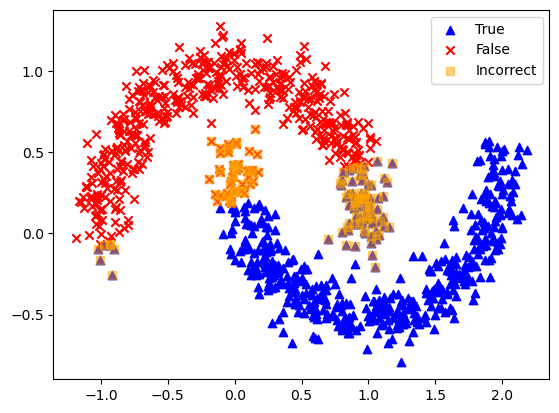

In [7]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(XA,yA)
yP = sgd.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.4 K-Vecinos más Cercanos (K-Nearest Neighbours)

**Definición:** La clasificación basada en vecinos es un tipo de aprendizaje "perezoso", pues no intenta construir un modelo interno, y en su lugar almacena pequeñas instancias de los datos de entrenamiento. La clasificación se calcula a partir de un simple voto de mayoría de los k vecinos más cercanos para cada punto.

**Ventajas:** Es un algoritmo fácil de implementar, robusto a ruido en los datos de entrenamiento, y efectivo si la cantidad de datos disponibles para entrenamiento es grande.

**Desventajas:** Es necesario determinar el valor de `K` y el costo de cálculo es alto, ya que es necesario calcular la distancia de cada instancia a todas las muestras de entrenamiento. Una posible solución para determinar `K` es agregar un circuito de retroalimentación (feedback loop) para determinar el número de vecinos.

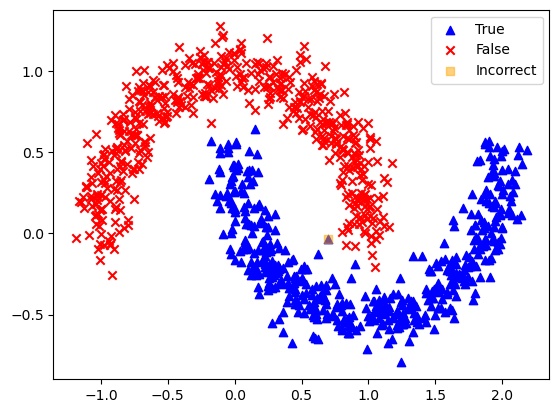

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(XA,yA)
yP = knn.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.5 Árbol de Decisiones

**Definición:** Dado un dato de atributos junto con sus clases, un árbol de decisión produce una secuencia de reglas que pueden usarse para clasificar los datos.

**Ventajas:** Un árbol de decisiones es simple de entender y visualizar, requiere poca preparación de los datos, y puede manejar tanto datos numéricos como categóricos.

**Desventajas:** El árbol de decisión puede crear árboles complejos que no se generalizan bien, y también pueden ser inestables porque pequeñas variaciones en los datos podrían provocar la generación de un árbol completamente diferente.



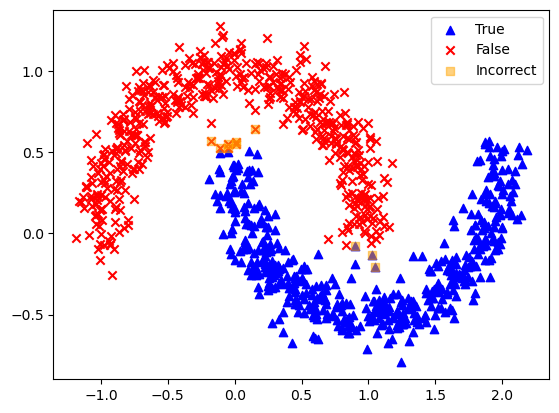

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10,random_state=101,\
                               max_features=None,min_samples_leaf=5)
dtree.fit(XA,yA)
yP = dtree.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.6 Bosque Aleatorio (Random Forest)

**Definición:** Un clasificador de bosque aleatorio es un meta-estimador que ajusta un cierto número de árboles de decisión en varios subconjuntos de datos y utiliza promedios para mejorar la precisión predictiva del modelo y controlar el sobreajuste. El tamaño del subconjunto es siempre el mismo que el de la muestra original de entrada, pero las muestras se extraen con reemplazos.

**Ventajas:** Reducción del sobreajuste y en la mayoría de los casos hay mejora de precisión con respecto a los árboles de decisión.

**Desventajas:** Predicción lenta en tiempo real, difícil de implementar y el algoritmo es complejo.

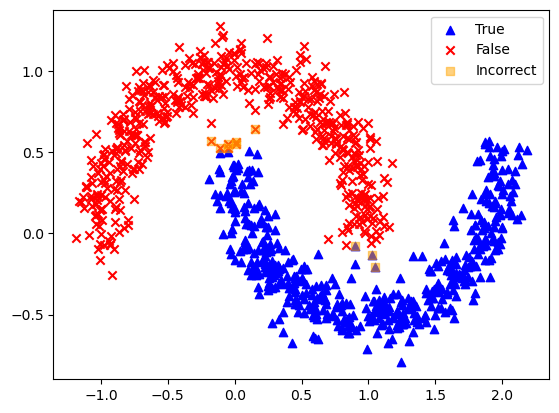

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70,oob_score=True,\
                             n_jobs=1,random_state=101,max_features=None,\
                             min_samples_leaf=3) #cambiar min_samples_leaf de 30 a 3
rfm.fit(XA,yA)
yP = rfm.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.7 Clasificador de Vectores de Soporte (Support Vector Classifier)

**Definición:** Una máquina de vectores de soporte es una representación de los datos de entrenamiento como puntos en el espacio, separados en categorías por una clara brecha que es lo más amplia posible. Luego, los nuevos ejemplos se mapean en ese mismo espacio y se predice a qué categoría pertenecen en función de en qué lado de la brecha se encuentran.

**Ventajas:** Es efectivo en espacios de altas dimensiones y utiliza un subconjunto de puntos de entrenamiento en la función de decisión, por lo que también es eficiente en la memoria.

**Desventajas:** El algoritmo no proporciona directamente estimaciones de probabilidad, estas se calculan utilizando una costosa validación cruzada de cinco iteraciones.

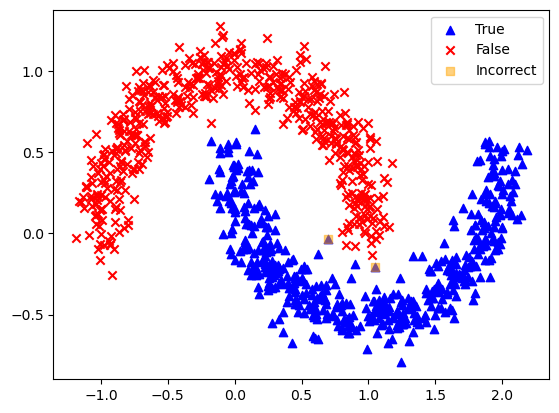

In [11]:
from sklearn.svm import SVC
svm = SVC(gamma='scale', C=1.0, random_state=101)
svm.fit(XA,yA)
yP = svm.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.8 Red Neuronal

El `MLPClassifier` implementa un algoritmo de perceptrón multicapa (MLP, del inglés multi-layer perceptron) que se entrena utilizando propagación en reversa (Backpropagation).

**Definición:** Una red neuronal es un conjunto de neuronas (funciones de activación) en capas que se procesan secuencialmente para relacionar una entrada con una salida.

**Ventajas:** Efectivo en espacios no lineales donde la estructura de la relación no es lineal. No se definen conocimientos previos ni estructura de ecuaciones especializadas aunque existen diferentes arquitecturas de red que pueden conducir a un mejor resultado.

**Desventajas:** Las redes neuronales no se extrapolan bien fuera del dominio de entrenamiento. También pueden requerir más tiempo para entrenar, ajustando las ponderaciones de los parámetros para minimizar una función de pérdida (función objetivo). Además, es más difícil explicar el resultado del entrenamiento y los cambios en la inicialización o el número de epochs (iteraciones) pueden conducir a resultados diferentes. Demasiadas epochs pueden provocar un sobreajuste, especialmente si hay un exceso de parámetros más allá del mínimo necesario para capturar la relación de las entradas con la(s) salida(s).

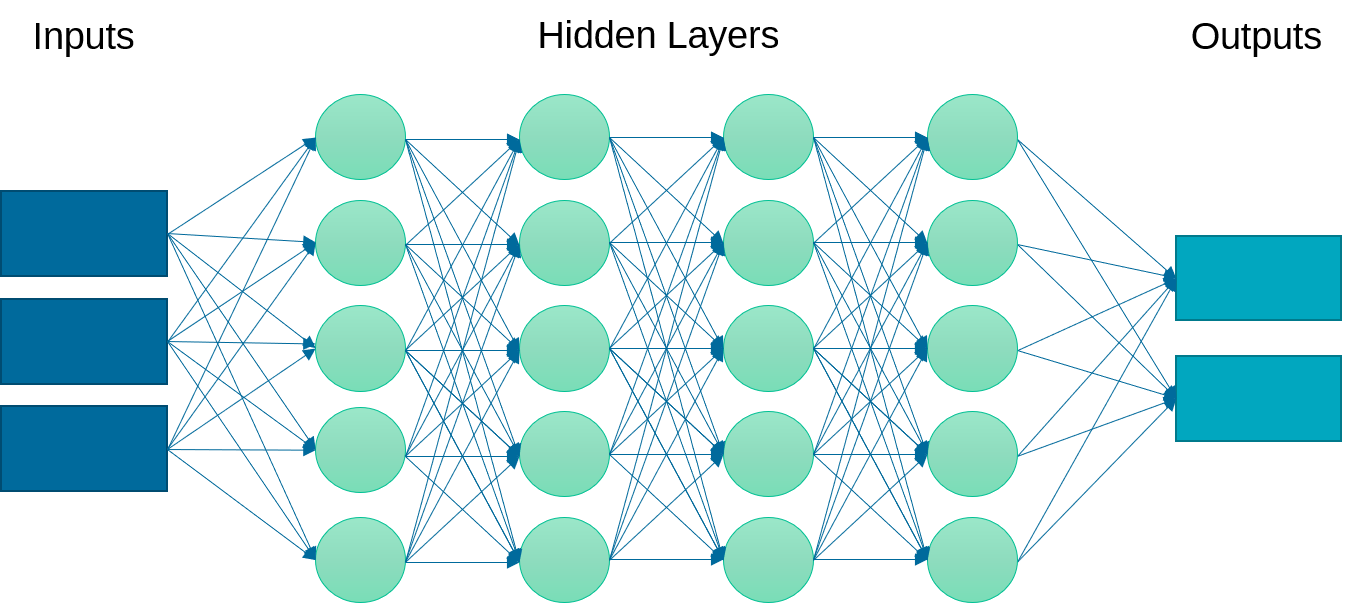

El MLP se entrena en dos arreglos: un arreglo X de tamaño `(n_samples, n_features)`, que contiene las muestras de entrenamiento representadas como vectores de características de punto flotante (floating points); y un arreglo `Y` de tamaño `(n_samples,)`, que contiene los valores objetivo (etiquetas de clase) para las muestras de entrenamiento. El MLP puede ajustar un modelo no lineal a los datos del entrenamiento. `clf.coefs_` contiene las matrices de ponderación que constituyen los parámetros del modelo. Actualmente, `MLPClassifier` solo admite la función de pérdida de entropía cruzada (Cross-Entropy), que permite estimaciones de probabilidad mediante la ejecución del método `predict_proba`. El MLP entrena usando Backpropagation; más precisamente, se entrena usando una forma de descenso de gradientes y los gradientes se calculan usando Backpropagation. Para la clasificación, minimiza la función de pérdida de entropía cruzada, dando un vector de estimaciones de probabilidad. `MLPClassifier` admite la clasificación de clases múltiples aplicando `Softmax` como función de salida. Además, el modelo admite la clasificación de múltiples etiquetas en la que una muestra puede pertenecer a más de una clase. Para cada clase, la salida sin procesar pasa a través de la función logística. Los valores mayores o iguales a 0.5 se redondean a 1, de lo contrario a 0. Para una salida prevista de una muestra, los índices donde el valor es 1 representan las clases asignadas de esa muestra.

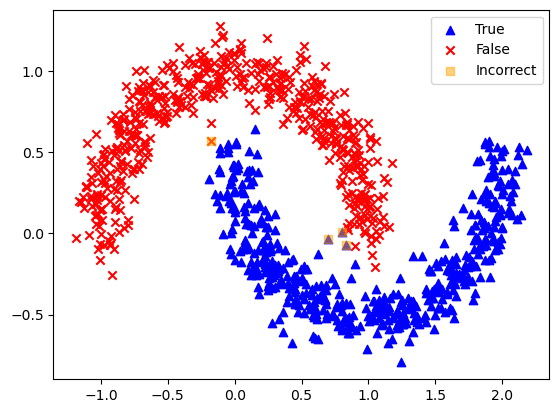

In [14]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=200,activation='relu',\
                    hidden_layer_sizes=(10,30,10), random_state=1, shuffle=True)
clf.fit(XA,yA)
yP = clf.predict(XB)
assess(yP)